<a href="https://colab.research.google.com/github/blaim/2025-1-vision/blob/main/HW2/HW2-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Fig0939(a)(headCT-Vandy).tif to Fig0939(a)(headCT-Vandy) (3).tif


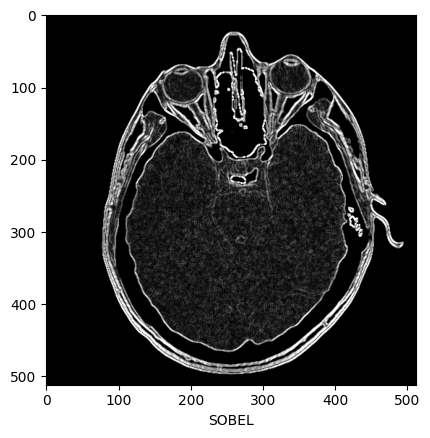

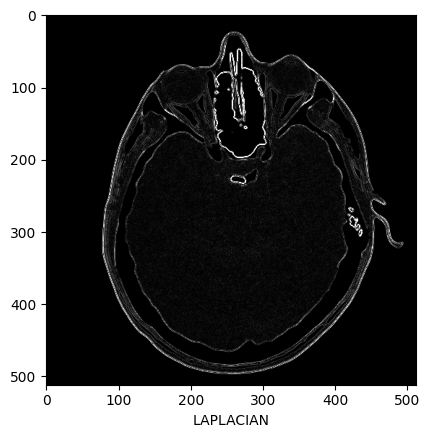

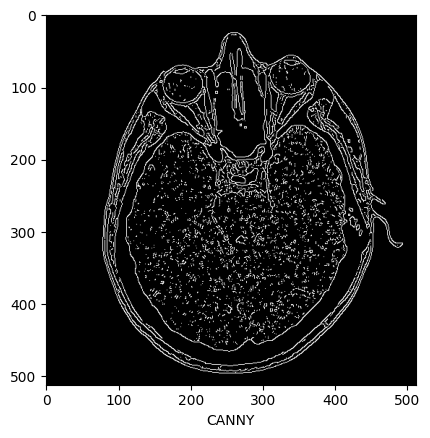

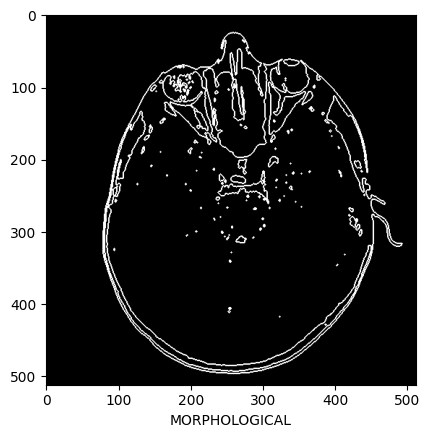

In [4]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 이미지 업로드(코랩 이미지 업로드 기능 이용)
uploaded = files.upload()

filename = list(uploaded.keys())[0]

image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

#####
#sobel사용
#####
grad_x=cv2.Sobel(image,cv2.CV_32F,1,0,ksize=3)
grad_y=cv2.Sobel(image,cv2.CV_32F,0,1,ksize=3)

#절댓값 취해 양수로 변환
sobel_x=cv2.convertScaleAbs(grad_x)
sobel_y=cv2.convertScaleAbs(grad_y)

# 에지 강도 계산
edge_strength=cv2.addWeighted(sobel_x,0.5,sobel_y,0.5,0)

#####
#라플레시안 사용
####

laplacian = cv2.Laplacian(image, cv2.CV_64F)
# 연산후 음수값 제거
laplacian_abs = cv2.convertScaleAbs(laplacian)

######
#canny edge detection 사용
######

canny_edge = cv2.Canny(image, 100, 100)


######
#morphological gradient 이용
######
# opening위해 이진화
t,bin_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

se = np.uint8([
    [0,1,0],
    [1,1,1],
    [0,1,0]
])

morphological = cv2.morphologyEx(bin_image, cv2.MORPH_GRADIENT, se)



#sobel 출력
plt.imshow(edge_strength,cmap='gray')
plt.xlabel('SOBEL')
plt.show()

#라플레시안 출력
plt.imshow(laplacian_abs,cmap='gray')
plt.xlabel('LAPLACIAN')
plt.show()

#canny 출력
plt.imshow(canny_edge,cmap='gray')
plt.xlabel('CANNY')
plt.show()

#morphological 출력
plt.imshow(morphological,cmap='gray')
plt.xlabel('MORPHOLOGICAL')
plt.show()

#SOBEL의 경우 부드럽게 edge를 잡아내는것 같지만 이미지가 약간 흐릿한것 같다
#laplacian의 경우edge는 잘 검출했지만 안구의 모양같은 세부정보까지 뭉뚱그렸다.
#canny edge detection의 경우 제일 깔끔하고 명확하게 나온것 같다
#morphological의 경우 깔끔하지만 세부정보를 다 날리는 결과가 나왔다.



In [ ]:
#